In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [287]:
apart2022 = pd.read_csv("../final/apart2022.csv")
house2022 = pd.read_csv("../final/house2022.csv")

In [288]:
print(apart2022.head())
print(apart2022.shape)
print(house2022.head())
print(house2022.shape)

   Unnamed: 0  price          suburb  beds  baths  parking  latitudes  \
0           0    495  EAST MELBOURNE     1      1        1   -37.8167   
1           1    495  EAST MELBOURNE     1      1        1   -37.8167   
2           2    420  EAST MELBOURNE     2      1        1   -37.8167   
3           3    420  EAST MELBOURNE     2      1        1   -37.8167   
4           4    550  EAST MELBOURNE     1      1        1   -37.8167   

   longitudes  school  train_station  fitness_gym  hospital  shopping_center  \
0    144.9879  8137.6          381.0        345.9     620.2           1558.5   
1    144.9879  8137.6          381.0        345.9     620.2           1558.5   
2    144.9879  8137.6          381.0        345.9     620.2           1558.5   
3    144.9879  8137.6          381.0        345.9     620.2           1558.5   
4    144.9879  8137.6          381.0        345.9     620.2           1558.5   

     park  erp_2022  natural_increase_2021_22  net_internal_migration_2021_22  \

In [289]:
list = [apart2022, house2022]
for i in list:
    i['rooms'] = i['beds'] + i['baths']

apart2022.head(5)

,Unnamed: 0,price,suburb,beds,baths,parking,latitudes,longitudes,school,train_station,...,hospital,shopping_center,park,erp_2022,natural_increase_2021_22,net_internal_migration_2021_22,net_overseas_migration_2021_22,2022income,suburbID,rooms
0,0,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,381.0,...,620.2,1558.5,1235.1,6335.2,-12.1,-63.4,-191.0,4224.0,0,2
1,1,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,381.0,...,620.2,1558.5,1235.1,6335.2,-12.1,-63.4,-191.0,4224.0,0,2
2,2,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,381.0,...,620.2,1558.5,1235.1,6335.2,-12.1,-63.4,-191.0,4224.0,0,3
3,3,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,381.0,...,620.2,1558.5,1235.1,6335.2,-12.1,-63.4,-191.0,4224.0,0,3
4,4,550,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,381.0,...,620.2,1558.5,1235.1,6335.2,-12.1,-63.4,-191.0,4224.0,0,2


In [290]:
house = house2022[['suburb','price','2022income','rooms']]
apart = apart2022[['suburb','price','2022income','rooms']]

In [291]:
house.head()


,suburb,price,2022income,rooms
0,EAST MELBOURNE,1100,4224.0,6
1,EAST MELBOURNE,1100,4224.0,6
2,EAST MELBOURNE,1150,4224.0,6
3,EAST MELBOURNE,1150,4224.0,6
4,EAST MELBOURNE,525,4224.0,3


In [292]:
from sklearn import preprocessing

money_list = ['price', '2022income']
scaler = preprocessing.MinMaxScaler()
names = house.columns
house.loc[:,money_list] = scaler.fit_transform(house.loc[:,money_list])
apart.loc[:,money_list] = scaler.fit_transform(apart.loc[:,money_list])


/var/folders/mz/ytcv9vg56yqf64xqlxptmkbc0000gn/T/ipykernel_13689/4168669478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.loc[:,money_list] = scaler.fit_transform(house.loc[:,money_list])
/var/folders/mz/ytcv9vg56yqf64xqlxptmkbc0000gn/T/ipykernel_13689/4168669478.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apart.loc[:,money_list] = scaler.fit_transform(apart.loc[:,money_list])


In [293]:
apart.head()

,suburb,price,2022income,rooms
0,EAST MELBOURNE,0.099,0.03622,2
1,EAST MELBOURNE,0.099,0.03622,2
2,EAST MELBOURNE,0.084,0.03622,3
3,EAST MELBOURNE,0.084,0.03622,3
4,EAST MELBOURNE,0.110,0.03622,2


In [294]:
house = house.loc[:,money_list].groupby(house['suburb']).mean().reset_index()
apart = apart.loc[:,money_list].groupby(house['suburb']).mean().reset_index()

Calculate the affordability

In [295]:
house['affordability'] = house["2022income"] / house["price"]
apart['affordability'] = apart["2022income"] / apart["price"]

In [296]:
apart.head()

,suburb,price,2022income,affordability
0,ABBOTSFORD,0.099,0.03622,0.365861
1,AIRPORT WEST,0.099,0.03622,0.365861
2,ALFREDTON,0.084,0.03622,0.431194
3,ALTONA,0.084,0.03622,0.431194
4,ALTONA MEADOWS,0.110,0.03622,0.329275


Bubble plots visualization

House

In [297]:
#transform categorical data to numeric

subs = pd.factorize(house["suburb"])[0].astype(np.uint16)
house['suburbID'] = subs


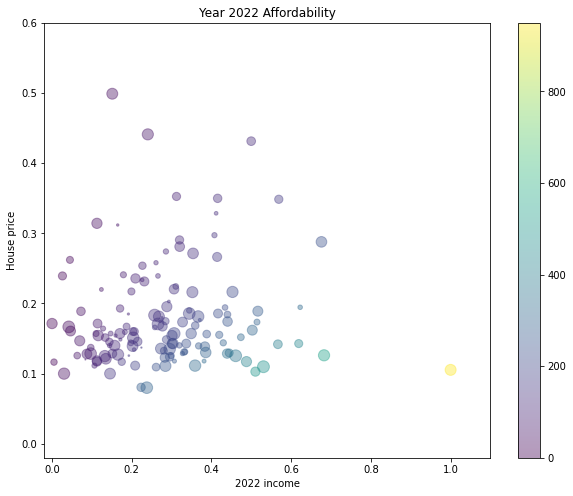

In [298]:
income = np.array(house['2022income'].tolist())

price = np.array(house['price'].tolist())

afford = np.array(house['affordability'].tolist())

sub =  np.array(house['suburbID'].tolist())


plt.figure(figsize=(10, 8))

plt.scatter(x=income, y=price, c = afford*100, s=sub, alpha=0.4)

plt.colorbar()
plt.xlabel("2022 income")
plt.ylabel("House price")
plt.title("Year 2022 Affordability")
plt.ylim(-0.02,0.6)
plt.xlim(-0.02,1.1)
plt.savefig("../plots/house affordability.png")

Apartment

In [299]:
subsapart = pd.factorize(apart["suburb"])[0].astype(np.uint16)
apart['suburbID'] = subsapart

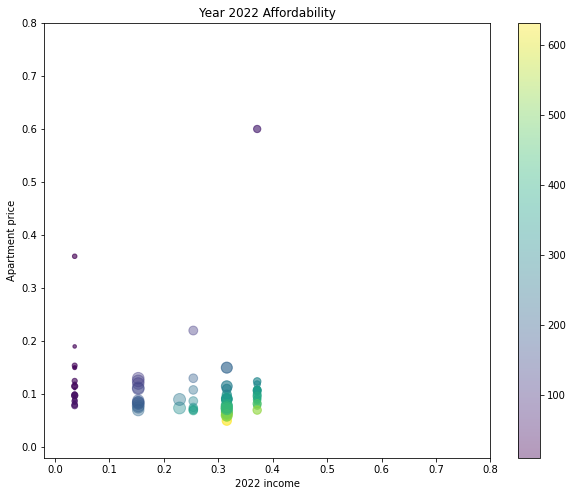

In [300]:
incomeapart = np.array(apart['2022income'].tolist())

priceapart = np.array(apart['price'].tolist())

affordapart = np.array(apart['affordability'].tolist())

subapart =  np.array(apart['suburbID'].tolist())
plt.figure(figsize=(10, 8))

plt.scatter(x=incomeapart, y=priceapart, c = affordapart*100, s=subapart, alpha=0.4)

plt.colorbar()
plt.xlabel("2022 income")
plt.ylabel("Apartment price")
plt.title("Year 2022 Affordability")
plt.ylim(-0.02,0.8)
plt.xlim(-0.02,0.8)
plt.savefig("../plots/apartment affordability.png")

In [301]:
housetop10 = house.sort_values(by="affordability" , ascending=False)
print(housetop10.head(10)['suburb'])

121         TARNEIT
127       TRUGANINA
86     MELTON SOUTH
142    WYNDHAM VALE
66        GROVEDALE
104     PASCOE VALE
77      KEYSBOROUGH
140         WODONGA
65          GLENROY
89           MERNDA
Name: suburb, dtype: object


In [302]:
aparttop10 = apart.sort_values(by="affordability" , ascending=False)
print(aparttop10.head(10)['suburb'])

86        MELTON SOUTH
87         MELTON WEST
89              MERNDA
88             MENTONE
71     HEIDELBERG WEST
70       HAWTHORN EAST
125             TOORAK
124          THORNBURY
108           RINGWOOD
109      RINGWOOD EAST
Name: suburb, dtype: object
